In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import json

kaggle_api = {
    "username": "abdulrafar",
    "key": "cb69639e74a4102181e270817fb6279a"
}

# Simpan ke ~/.kaggle/kaggle.json
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_api, f)
os.chmod("/root/.kaggle/kaggle.json", 600)

# Install kaggle CLI
!pip install -q kaggle


In [ ]:
import shutil
import os

# Hapus folder ekstrak dan file zip kalau ada
shutil.rmtree('/content/Data', ignore_errors=True)
os.remove('/content/garbage-classification.zip') if os.path.exists('/content/garbage-classification.zip') else None

print("Semua folder dan file lama telah dihapus.")


Semua folder dan file lama telah dihapus.


In [ ]:
# Unduh dataset dari Kaggle
!kaggle datasets download -d asdasdasasdas/garbage-classification

# Ekstrak dataset
!unzip garbage-classification.zip -d Data

Streaming output truncated to the last 5000 lines.
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Data/Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Data/Ga

In [ ]:
# === 2. Siapkan Struktur Folder ===
source_dir = 'Data/garbage classification/Garbage classification'
train_dir = 'train'
valid_dir = 'valid'
test_dir  = 'test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [ ]:

from sklearn.model_selection import train_test_split
# === 3. Split Data ke Train/Valid/Test ===
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path): continue

    images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    train_files, temp_files = train_test_split(images, test_size=0.3, random_state=42)
    val_files, test_files   = train_test_split(temp_files, test_size=0.5, random_state=42)

    for folder, file_list in zip([train_dir, valid_dir, test_dir], [train_files, val_files, test_files]):
        class_folder = os.path.join(folder, class_name)
        os.makedirs(class_folder, exist_ok=True)
        for f in file_list:
            shutil.copy(os.path.join(class_path, f), os.path.join(class_folder, f))

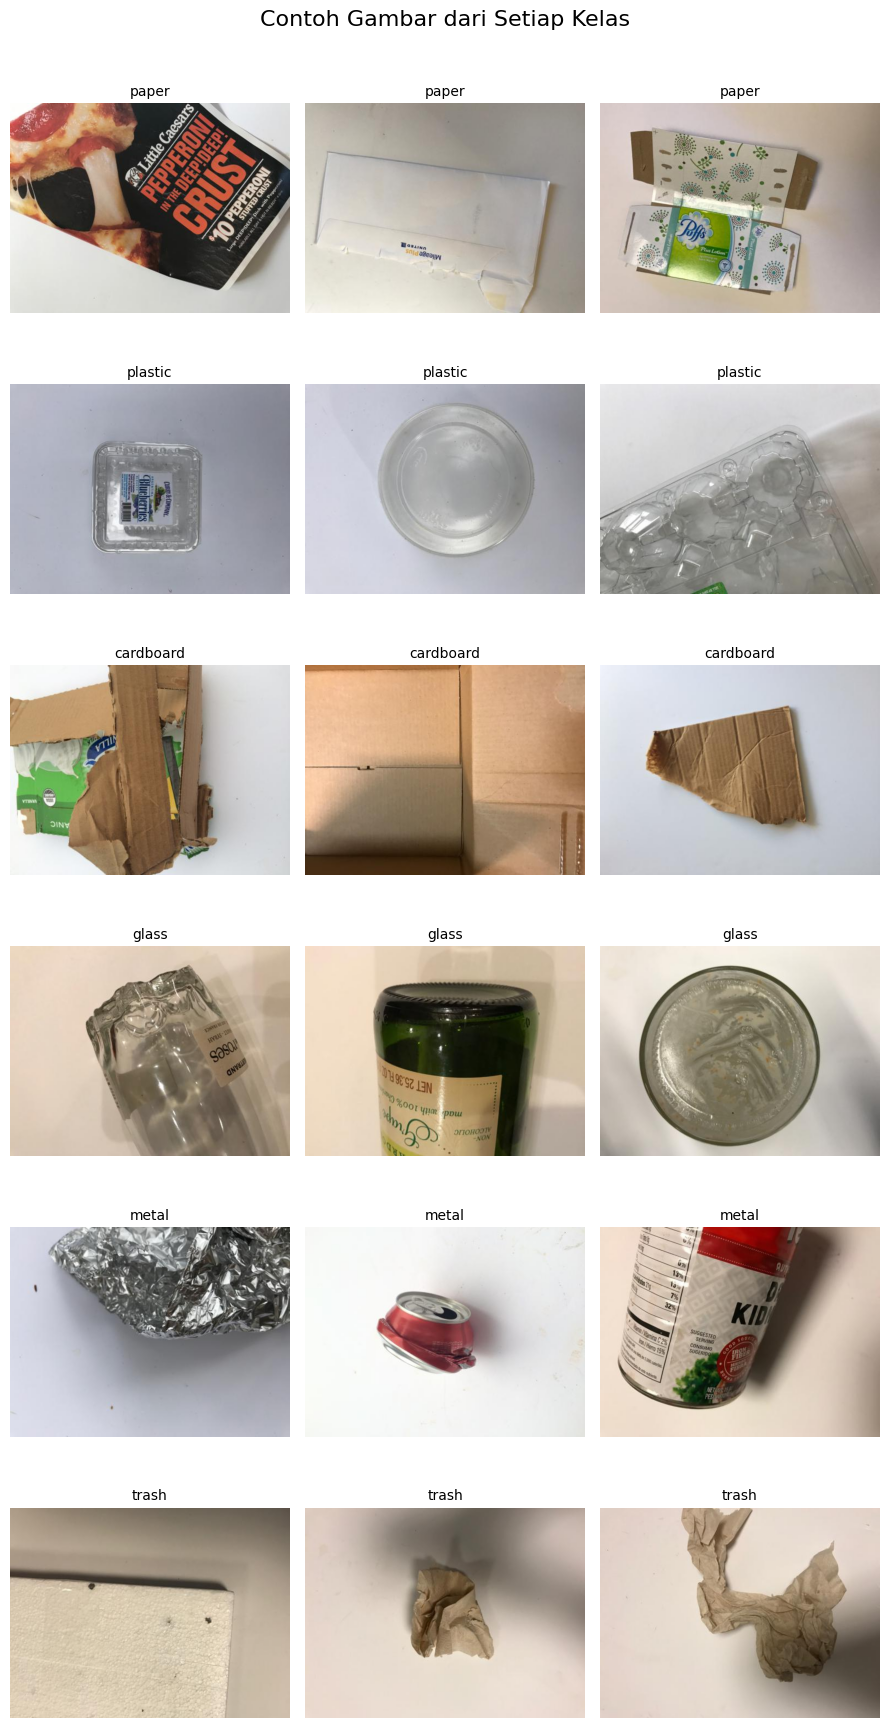

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
import random



# Folder dataset
base_dir = 'train'

# Ambil daftar kelas
classes = [cls for cls in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, cls))]

# Tentukan berapa gambar yang ingin divisualisasikan per kelas
samples_per_class = 3
files_per_row = samples_per_class
number_of_rows = len(classes)

# Buat figure
fig, axs = plt.subplots(number_of_rows, files_per_row, figsize=(files_per_row * 3, number_of_rows * 3))
fig.suptitle('Contoh Gambar dari Setiap Kelas', fontsize=16)

# Tampilkan beberapa gambar dari setiap kelas
for row, cls in enumerate(classes):
    cls_dir = os.path.join(base_dir, cls)
    image_files = [f for f in os.listdir(cls_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    sample_images = random.sample(image_files, min(samples_per_class, len(image_files)))

    for col, img_name in enumerate(sample_images):
        img_path = os.path.join(cls_dir, img_name)
        image = Image.open(img_path)

        if number_of_rows == 1:
            ax = axs[col]
        elif files_per_row == 1:
            ax = axs[row]
        else:
            ax = axs[row][col]

        ax.imshow(image)
        ax.axis('off')
        ax.set_title(cls, fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [ ]:
train = 'train'
valid = 'valid'   # kalau kamu ingin gunakan validasi manual
test = 'test'


In [ ]:
# Image size & batch
IMAGE_SIZE = (300, 300)
BATCH_SIZE = 32

In [ ]:
# Augmentasi hanya untuk train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 1766 images belonging to 6 classes.


In [ ]:
# Validasi & Test tanpa augmentasi
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    valid,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

test_generator = valid_datagen.flow_from_directory(
    test,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 378 images belonging to 6 classes.
Found 383 images belonging to 6 classes.


In [ ]:
# Simpan label
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('Labels.txt', 'w') as file:
    file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [ ]:
# === MODEL MobileNetV2 === #
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(300, 300, 3))
base_model.trainable = False  # Bekukan dulu

# Tambahkan classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

<ipython-input-16-34eef88c5ffe>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(300, 300, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 150, 150,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 150, 150,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 150, 150,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 150, 150,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 150, 150,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 150, 150,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 150, 150,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 150, 150,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 150, 150,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 150, 150,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 150, 150,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 151, 151,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 75, 75,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 75, 75,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 75, 75,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 75, 75,    │      2,304 │ block_1_depthwis

 Total params: 2,342,246 (8.93 MB)

 Trainable params: 84,262 (329.15 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

In [ ]:
# Train
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    callbacks=[early_stop, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 65s 927ms/step - accuracy: 0.3198 - loss: 1.5860 - val_accuracy: 0.6640 - val_loss: 0.9730 - learning_rate: 0.0010
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 62s 716ms/step - accuracy: 0.6230 - loss: 1.0289 - val_accuracy: 0.7593 - val_loss: 0.7322 - learning_rate: 0.0010
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 712ms/step - accuracy: 0.7250 - loss: 0.7914 - val_accuracy: 0.7540 - val_loss: 0.6621 - learning_rate: 0.0010
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 720ms/step - accuracy: 0.7708 - loss: 0.6678 - val_accuracy: 0.8069 - val_loss: 0.5777 - learning_rate: 0.0010
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 741ms/step - accuracy: 0.7544 - loss: 0.6529 - val_accuracy: 0.7989 - val_loss: 0.5814 - learning_rate: 0.0010
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 710ms/step - accuracy: 0.7720 - loss: 0.6273 - val_accuracy: 0.8148 - val_loss: 0.5248 - learning_rate: 0.0010
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 709ms/step - accuracy: 0.8144 - loss: 0.

In [ ]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Akurasi Akhir Training: {final_train_acc:.4f}")
print(f"Akurasi Akhir Validasi: {final_val_acc:.4f}")


Akurasi Akhir Training: 0.9264
Akurasi Akhir Validasi: 0.8624
